In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import GridSearchCV
from sklearn import metrics

In [3]:
def notEmpty(s):
    return s != ''

In [4]:

mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

In [39]:
names = ['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
path = "datas/boston_housing.data"

fd = pd.read_csv(path, header=None)
data = np.empty((len(fd), 14))
for i, d in enumerate(fd.values):
    d = list(map(float,list(filter(notEmpty, d[0].split(' ')))))
    data[i] = d


x, y = np.split(data, (13,), axis=1)
y = y.ravel() 

print ("样本数据量:%d, 特征个数：%d" % x.shape)
print ("target样本数据量:%d" % y.shape[0])

样本数据量:506, 特征个数：13
target样本数据量:506


In [44]:

models = [
    Pipeline([
            ('ss', StandardScaler()),
            ('poly', PolynomialFeatures()),
            ('linear', RidgeCV(alphas=np.logspace(-3,1,20)))
        ]),
    Pipeline([
            ('ss', StandardScaler()),
            ('poly', PolynomialFeatures()),
            ('linear', LassoCV(alphas=np.logspace(-3,1,20)))
        ])
]


parameters = {
    "poly__degree": [3,2,1],
    "poly__interaction_only": [True, False],
    "poly__include_bias": [True, False],
    "linear__fit_intercept": [True, False]
}


In [45]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Ridge算法:最优参数: {'poly__degree': 3, 'poly__interaction_only': True, 'poly__include_bias': False, 'linear__fit_intercept': True}
Ridge算法:R值=0.832
Lasso算法:最优参数: {'poly__degree': 3, 'poly__interaction_only': True, 'poly__include_bias': True, 'linear__fit_intercept': False}
Lasso算法:R值=0.849


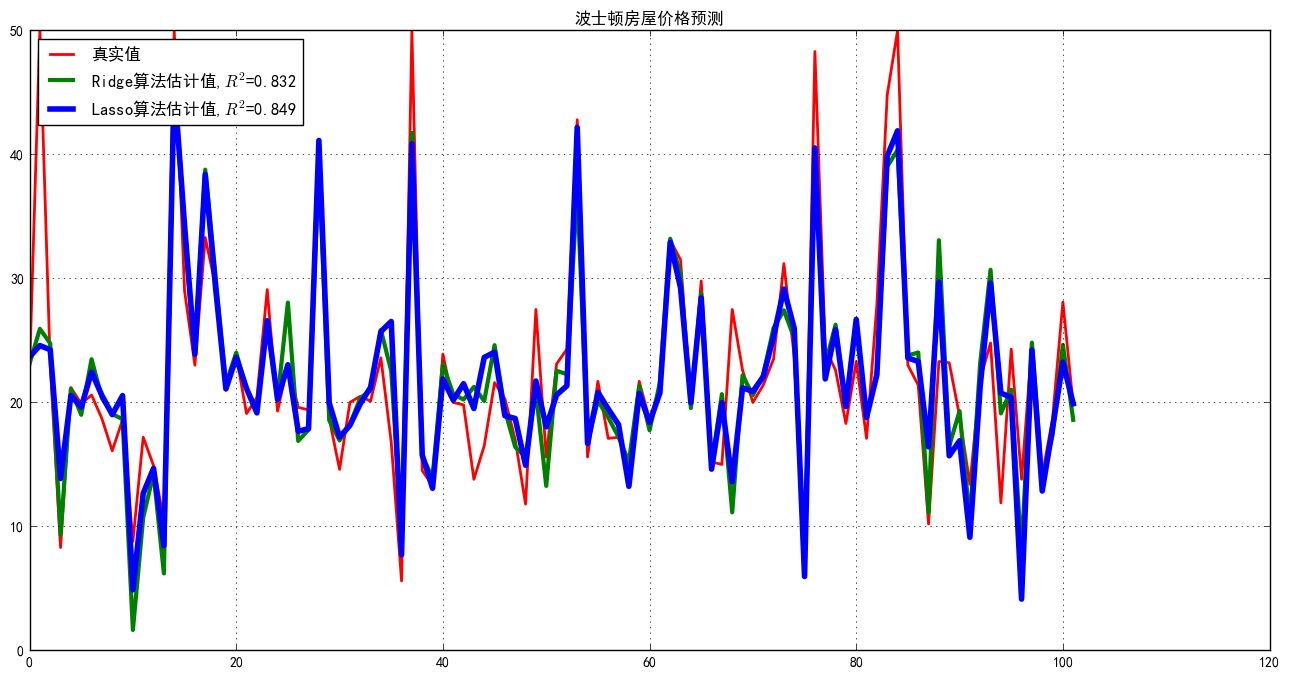

In [47]:

titles = ['Ridge', 'Lasso']
colors = ['g-', 'b-']
plt.figure(figsize=(16,8), facecolor='w')
ln_x_test = range(len(x_test))

plt.plot(ln_x_test, y_test, 'r-', lw=2, label=u'真实值')
for t in range(2):
    
    model = GridSearchCV(models[t], param_grid=parameters, n_jobs=1)
    
    model.fit(x_train, y_train)
    
    
    print ("%s算法:最优参数:" % titles[t],model.best_params_)
    print ("%s算法:R值=%.3f" % (titles[t], model.best_score_))
    
    y_predict = model.predict(x_test)
    
    plt.plot(ln_x_test, y_predict, colors[t], lw = t + 3, label=u'%s算法估计值,$R^2$=%.3f' % (titles[t],model.best_score_))

plt.legend(loc = 'upper left')
plt.grid(True)
plt.title(u"波士顿房屋价格预测")
plt.show()

In [51]:

model = Pipeline([
            ('ss', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)),
            ('linear', LassoCV(alphas=np.logspace(-3,1,20), fit_intercept=False))
        ])

model.fit(x_train, y_train)



print (model.get_params('linear')['linear'].coef_)
print ("参数:", list(zip(names,model.get_params('linear')['linear'].coef_)))
print ("截距:", model.get_params('linear')['linear'].intercept_)



[ -4.66278025e+01  -1.58970454e+01   6.38824344e+00   0.00000000e+00
  -1.02636569e+00   2.96479179e+00  -5.53936097e-01  -2.00893201e+00
   2.84337023e-01   0.00000000e+00  -8.84265139e-01   1.54585343e+00
  -3.19390999e+00  -3.20356631e+01   2.22937398e+01   9.07385138e-01
  -0.00000000e+00   9.81881624e-01   0.00000000e+00  -4.18168160e-01
   1.83370285e+00   1.96638835e+00   0.00000000e+00  -1.53966577e-02
   1.05500476e+00  -5.82400435e-01  -1.41470271e-01  -3.94613847e-01
  -1.59152223e-01  -1.20580909e-01   2.51501036e-01   0.00000000e+00
   6.68769410e-01  -8.76573564e-03   7.92549873e-01  -9.70357918e-01
  -0.00000000e+00  -0.00000000e+00   3.88242682e-01   8.66552311e-01
  -6.43003491e-01  -2.15962734e+00   8.26773597e-01  -6.67319312e-02
   0.00000000e+00  -1.83802077e+00  -5.64879585e-01  -6.90179857e-01
   3.90182795e-01  -2.22441388e-01   4.41343849e-01   0.00000000e+00
   5.31003095e-02   1.95611617e+00  -8.46567707e-01  -0.00000000e+00
  -2.31020930e-01  -0.00000000e+00

In [53]:
name = names
x, x2 = np.split(data, (13,), axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, x2, test_size=0.2, random_state=0)

ss = StandardScaler()
poly = PolynomialFeatures(degree=2, include_bias=True, interaction_only=True)
# include_bias: 决定多项式转换后是否添加常数项，默认为true，添加
# interaction_only：决定多项式转换是否仅仅添加不同item之间的结合数据/交互项，
# False表示否，会添加类似a^2；true表示仅仅添加类似a1*a2
linear = LassoCV(alphas=np.logspace(-3,1,20), fit_intercept=False)


x_train = ss.fit_transform(x_train, y_train)
print (x_train[0])

x_train = poly.fit_transform(x_train, y_train)
print (x_train[0])
powers = poly.powers_
print (powers.shape)
print (poly.powers_)

linear.fit(x_train, y_train)
coef = linear.coef_
print (coef)
print (coef.shape)

[-0.37257438 -0.49960763 -0.70492455  3.66450153 -0.42487874  0.93567804
  0.69366877 -0.4372179  -0.16224243 -0.56165616 -0.48463784  0.3716906
 -0.41100022]
[ 1.         -0.37257438 -0.49960763 -0.70492455  3.66450153 -0.42487874
  0.93567804  0.69366877 -0.4372179  -0.16224243 -0.56165616 -0.48463784
  0.3716906  -0.41100022  0.18614101  0.26263683 -1.3652994   0.15829894
 -0.34860967 -0.25844321  0.16289619  0.06044737  0.2092587   0.18056365
 -0.13848239  0.15312815  0.35218569 -1.83081293  0.21227266 -0.46747189
 -0.34656221  0.2184374   0.08105755  0.2806077   0.24212876 -0.18569946
  0.20533884 -2.5831971   0.29950746 -0.65958242 -0.48898414  0.30820563
  0.11436867  0.39592522  0.34163311 -0.26201383  0.28972414 -1.55696879
  3.42879361  2.54195025 -1.60218565 -0.59453762 -2.05818985 -1.77595611
  1.36206075 -1.50611092 -0.39754971 -0.29472511  0.18576459  0.06893336
  0.23863576  0.20591232 -0.15792343  0.17462525  0.64905063 -0.40909519
 -0.15180668 -0.52552934 -0.45346499  

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 20.51331896  -0.          -0.          -0.           0.57192997
  -1.21048388   2.73525048  -0.3641607   -1.41433229   0.          -0.94264752
  -1.4112939    0.97484229  -3.46817031   0.          -0.           0.          -0.
   0.36295722  -0.           0.          -0.48516999  -0.          -0.           0.
   0.           0.           0.           0.           0.10542424   0.
   0.11062879   0.           0.           0.28934775  -0.          -0.           0.
   0.           0.           0.70506945  -0.           0.           0.58505332
  -0.           0.          -0.37074237  -0.44371406  -0.40817367
   0.22804441  -0.           0.3529233    0.33152187   0.           0.
  -0.33793149  -0.45309031  -0.           0.          -0.48139003  -0.          -0.
   0.           0.          -0.4293308    0.          -1.04297093
  -0.18279266  -1.11835985  -0.          -1.46183075   0.           0.36878532
   0.          -0.36083192  -0.          -0.38849189  -0.          -0.           0.
  -

In [56]:
from functools import reduce 
# name = ['a', 'b', 'c']
name2 = []
for i in powers:
    tname = list(zip(name, i))
    tname = list(filter(lambda x: x[1] != 0, tname))
    tname = list(map(lambda x: x[0] * x[1], tname))
    if tname:
        tname = list(reduce(lambda x,y: x+"_"+y, tname))
    else:
        tname = "1"
    name2.append(tname)

In [58]:
print (list(zip(name2, coef)))

[('1', 20.513318960925737), (['C', 'R', 'I', 'M'], -0.0), (['Z', 'N'], -0.0), (['I', 'N', 'D', 'U', 'S'], -0.0), (['C', 'H', 'A', 'S'], 0.5719299650285572), (['N', 'O', 'X'], -1.2104838813627306), (['R', 'M'], 2.7352504816005969), (['A', 'G', 'E'], -0.36416069603820328), (['D', 'I', 'S'], -1.4143322880047633), (['R', 'A', 'D'], 0.0), (['T', 'A', 'X'], -0.94264752185032152), (['P', 'T', 'R', 'A', 'T', 'I', 'O'], -1.4112938956575594), (['B'], 0.97484228871090606), (['L', 'S', 'T', 'A', 'T'], -3.4681703101620203), (['C', 'R', 'I', 'M', '_', 'Z', 'N'], 0.0), (['C', 'R', 'I', 'M', '_', 'I', 'N', 'D', 'U', 'S'], -0.0), (['C', 'R', 'I', 'M', '_', 'C', 'H', 'A', 'S'], 0.0), (['C', 'R', 'I', 'M', '_', 'N', 'O', 'X'], -0.0), (['C', 'R', 'I', 'M', '_', 'R', 'M'], 0.36295721739146075), (['C', 'R', 'I', 'M', '_', 'A', 'G', 'E'], -0.0), (['C', 'R', 'I', 'M', '_', 'D', 'I', 'S'], 0.0), (['C', 'R', 'I', 'M', '_', 'R', 'A', 'D'], -0.48516998651169502), (['C', 'R', 'I', 'M', '_', 'T', 'A', 'X'], -0.0), 

In [59]:
len(name2)

92